In [62]:
import scipy
scipy.__version__

'1.4.1'

In [63]:
import numpy as np
import scipy.optimize as opt

In [64]:
def f(x): return np.exp(x) - x - 2

In [65]:
np.sign(f(-2) * f(0))

-1.0

In [66]:
raiz = opt.root_scalar(f, method='bisect', bracket=[-2,0])
raiz

      converged: True
           flag: 'converged'
 function_calls: 42
     iterations: 40
           root: -1.8414056604360667

In [69]:
raiz.root

-1.8414056604360667

In [13]:
raiz.iterations

40

In [16]:
opt.root_scalar(f, method='bisect', bracket=[-2,0]).root

-1.8414056604360667

In [20]:
opt.root_scalar(f, method='bisect', bracket=[-2,0], xtol=1e-1)

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 5
           root: -1.8125

In [21]:
opt.root_scalar(f, method='bisect', bracket=[-2,0], rtol=1e-1)

      converged: True
           flag: 'converged'
 function_calls: 6
     iterations: 4
           root: -1.875

In [22]:
opt.root_scalar(f, method='bisect', bracket=[-2,0], rtol=1e-1, xtol=1e-1)

      converged: True
           flag: 'converged'
 function_calls: 5
     iterations: 3
           root: -1.75

In [23]:
opt.root_scalar(f, method='bisect', bracket=[-2,0], xtol=1e-10, maxiter=100)

      converged: True
           flag: 'converged'
 function_calls: 37
     iterations: 35
           root: -1.8414056604378857

In [24]:
opt.root_scalar(f, method='bisect', bracket=[-2,0], xtol=1e-10, maxiter=30)

      converged: False
           flag: 'convergence error'
 function_calls: 32
     iterations: 30
           root: -1.8414056617766619

In [25]:
def f(x): return np.cos(x) - np.sqrt(x)

In [27]:
vp = opt.root_scalar(f, method='bisect', bracket=[0,1], xtol=1e-40).root

In [28]:
r = []

In [29]:
e = []

In [31]:
for i in range(1,7):
    x = opt.root_scalar(f, method='bisect', bracket=[0,1], maxiter=i).root
    r.append(x)
    e.append(np.around(np.absolute(x - vp) * 100 / 2, decimals=2))

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
def f(x): return 5 * np.sin(x ** 2) - np.exp(x / 10)

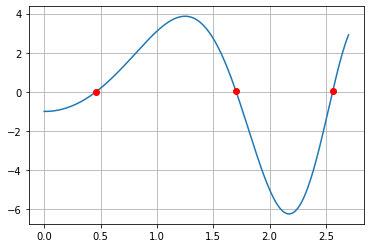

In [34]:
x = np.linspace(0,2.7,200)
plt.plot(x,f(x))
11
plt.plot([0.46, 1.7, 2.56], [f(0.46), f(1.7), f(2.56)], 'o', color='r')
plt.grid(True)

In [36]:
np.sign(f(0.4) * f(0.5))

-1.0

In [37]:
np.sign(f(1.7) * f(1.8))

-1.0

In [38]:
np.sign(f(2.5) * f(2.6))

-1.0

In [39]:
print('1ª raiz positiva: ', opt.root_scalar(f, method='bisect', bracket=[0.4,0.5], xtol=1e-5).root)
print('2ª raiz positiva: ', opt.root_scalar(f, method='bisect', bracket=[1.7,1.8], xtol=1e-5).root)
print('3ª raiz positiva: ', opt.root_scalar(f, method='bisect', bracket=[2.5,2.6], xtol=1e-5).root)

1ª raiz positiva:  0.459307861328125
2ª raiz positiva:  1.703570556640625
3ª raiz positiva:  2.558209228515625


In [40]:
def fa(vd, vs = 30, R = 1e+3): return 1e-12 * np.exp(((1.60217653e-19 * vd) / (4.1419509e-25))-1) - ((vs - vd) / (R))

C:\Users\jarde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


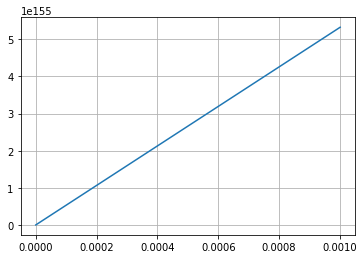

In [42]:
x = np.linspace(0, 1, 1000)
plt.plot(x, fa(x))
plt.grid(True)

In [44]:
opt.root_scalar(fa, method='bisect', bracket=[0,0.1]).root

C:\Users\jarde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


6.495182024082167e-05

In [45]:
def fd(vd, vs = 300e-3, R = 1e+3): return 1e-12 * np.exp(((1.60217653e-19 * vd) / (4.1419509e-25))-1) - ((vs - vd) / (R))

C:\Users\jarde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


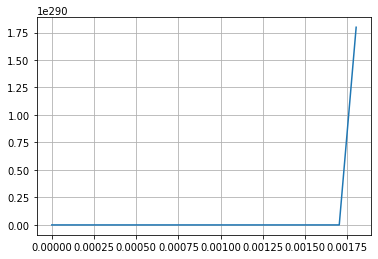

In [46]:
x = np.linspace(0,.1,1000)
plt.plot(x,fd(x))
plt.grid(True)

In [47]:
opt.root_scalar(fd,method='bisect', bracket=[0,0.1]).root

C:\Users\jarde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


5.304607184370981e-05

In [48]:
def f(vd, vs, R): return 1e-12 * np.exp(((1.60217653e-19 * vd) / (4.1419509e-25))-1) - ((vs - vd) / (R))

In [50]:
vs = 300e-3

In [51]:
R = 1e+3

In [52]:
opt.root_scalar(f, args=(vs,R), method='bisect', bracket=[0,0.1]).root

C:\Users\jarde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


5.304607184370981e-05

In [53]:
vs = np.array([30, 3, 3, 300e-3, -300e-3, -30, -30])
R = np.array([1e+3, 1e+3, 1e+4, 1e+3, 1e+3, 1e+3, 1e+4])

In [54]:
vd = []
for i in range(len(vs)):
    Vs = vs[i]
    r = R[i]
    if Vs>0:
        a,b = 0,.1
    else:
        a, b = -32,.1
    x = opt.root_scalar(f, args=(Vs,r), method='bisect', bracket=[a,b]).root
    vd.append(x)
vd

C:\Users\jarde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


[6.495182024082167e-05,
 5.899912648601458e-05,
 5.3046482207719243e-05,
 5.304607184370981e-05,
 -0.299999999999072,
 -30.00000000000098,
 -30.00000000000098]

Text(0, 0.5, '$V_d (V)$')

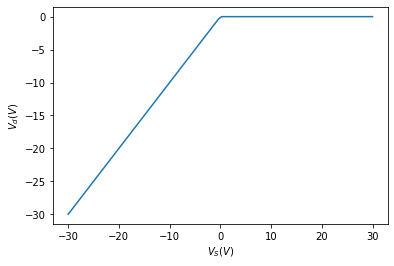

In [55]:
plt.plot(vs,vd)
plt.xlabel('$V_S (V)$')
plt.ylabel('$V_d (V)$')

In [57]:
id = (vs - vd) * 1000 / R
id

array([ 2.99999350e+01,  2.99994100e+00,  2.99994695e-01,  2.99946954e-01,
       -9.27979915e-13,  9.80548975e-13,  9.80548975e-14])

Text(0, 0.5, '$I_d (mA)$')

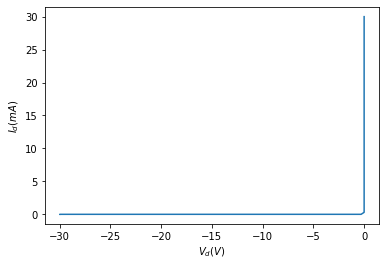

In [58]:
plt.plot(vd,id)
plt.xlabel('$V_d (V)$')
plt.ylabel('$I_d (mA)$')